In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [3]:
# Get the information on the DataFrame
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3000 non-null   float64
 1   HouseAge    3000 non-null   float64
 2   AveRooms    3000 non-null   float64
 3   AveBedrms   3000 non-null   float64
 4   Population  3000 non-null   float64
 5   AveOccup    3000 non-null   float64
 6   Latitude    3000 non-null   float64
 7   Longitude   3000 non-null   float64
dtypes: float64(8)
memory usage: 187.6 KB


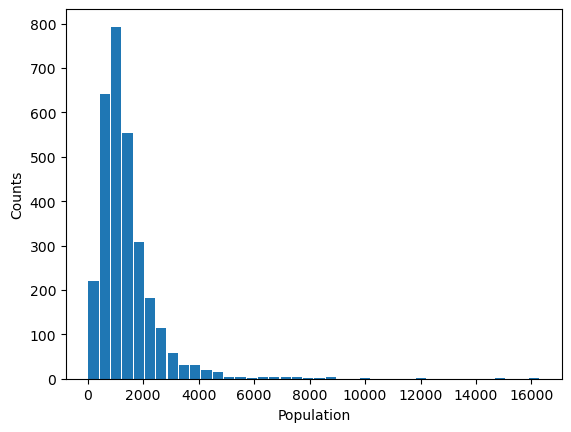

1387.9633333333334
1152.5
0    1128.0
Name: Population, dtype: float64


In [9]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(california_data['Population'],bins=40,rwidth=0.9)
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(california_data['Population'].mean())
print(california_data['Population'].median())
print(california_data['Population'].mode())

<Axes: >

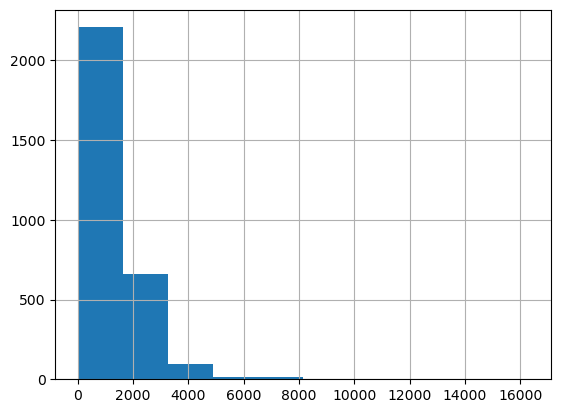

In [5]:
california_data['Population'].hist()

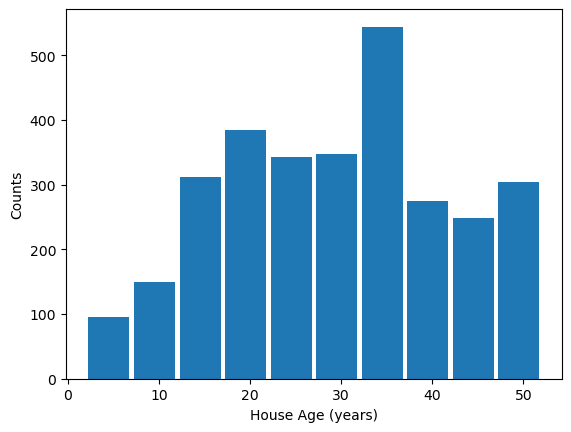

NormaltestResult(statistic=4.806200176127431, pvalue=0.09043715511966774)
NormaltestResult(statistic=178.84579120530674, pvalue=1.459250611444344e-39)


In [14]:
# Determine if the house age in California is normally distributed using a small and large sample size.
plt.hist(california_data['HouseAge'],rwidth=0.9)
plt.xlabel('House Age (years)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(california_data["HouseAge"].sample(100)))
print(st.normaltest(california_data["HouseAge"].sample(2000)))

In [16]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.2974592743428364
The interquartile range of occupancy is: 0.8723682937387887
The the median of occupancy is: 2.81970199317512 
Values below 1.1165385399958647 could be outliers.
Values above 4.60601171495102 could be outliers.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


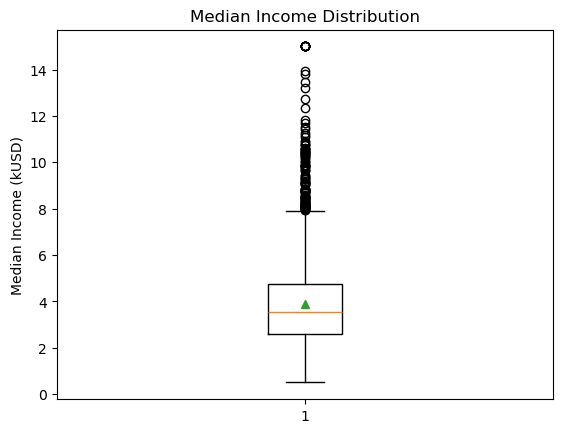

In [18]:
# The second example again looks at the LAX temperature data set and computes quantiles
Median_Income_Cal = california_data['MedInc']

fig1, ax1 = plt.subplots()
ax1.set_title('Median Income Distribution')
ax1.set_ylabel('Median Income (kUSD)')
ax1.boxplot(Median_Income_Cal, showmeans=True)
plt.show()

In [19]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of the potential outliers is {outlier_occupancy['MedInc'].min()}")
print(f"The maximum median income of the potential outliers is {outlier_occupancy['MedInc'].max()}")

The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


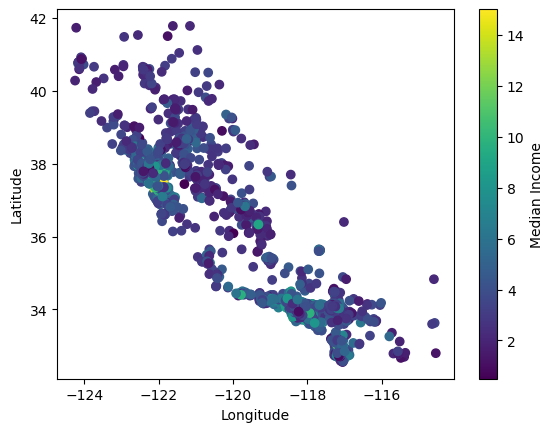

In [20]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(california_data['Longitude'],california_data['Latitude'],c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Median Income")
plt.show()